Create an “Academic performance” dataset of students and
perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If
there are missing values and/or inconsistencies, use any of
the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers,
use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables.
The purpose of this transformation should be one of the
following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation
into a linear one, or to decrease the skewness and convert the
distribution into a normal distribution.
Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv(r'/home/pict/Downloads/StudentsPerformance (3).csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()       # no null values found 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.describe()      # outliers may be present in all the tables as a diff is observed 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
numeric_columns = ['math score', 'reading score', 'writing score']
skewness=df[numeric_columns].skew()
skewness                          # little left skewed 

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [9]:
def custom_boxplot(data, ax=None):
   
    data = np.array(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_whisker = max(data[data >= (q1 - 1.5 * iqr)].min(), q1 - 1.5 * iqr)
    upper_whisker = min(data[data <= (q3 + 1.5 * iqr)].max(), q3 + 1.5 * iqr)
    outliers = data[(data < lower_whisker) | (data > upper_whisker)]

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    box_width = 0.3
    center = 0.5
    ax.plot([center - box_width / 2, center + box_width / 2],
            [q1, q1], color='black', lw=1.5)  # Lower box edge
    ax.plot([center - box_width / 2, center + box_width / 2],
            [q3, q3], color='black', lw=1.5)  # Upper box edge
    ax.plot([center - box_width / 2, center - box_width / 2],
            [q1, q3], color='black', lw=1.5)  # Left box edge
    ax.plot([center + box_width / 2, center + box_width / 2],
            [q1, q3], color='black', lw=1.5)  # Right box edge

    median = np.median(data)
    ax.plot([center - box_width / 2, center + box_width / 2],
            [median, median], color='orange', lw=2)  # Median line

    ax.plot([center, center], [lower_whisker, q1], color='black', lw=1.5)  # Lower whisker
    ax.plot([center, center], [q3, upper_whisker], color='black', lw=1.5)  # Upper whisker

    cap_width = 0.1
    ax.plot([center - cap_width / 2, center + cap_width / 2],
            [lower_whisker, lower_whisker], color='black', lw=1.5)
    ax.plot([center - cap_width / 2, center + cap_width / 2],
            [upper_whisker, upper_whisker], color='black', lw=1.5)

    ax.scatter([center] * len(outliers), outliers, color='green', zorder=3) # outliers

    ax.set_xlim(0, 1)
    ax.set_xticks([center])
    ax.set_xticklabels(['Data'])
    ax.set_ylabel('Values')

    if ax is None:
        plt.show()

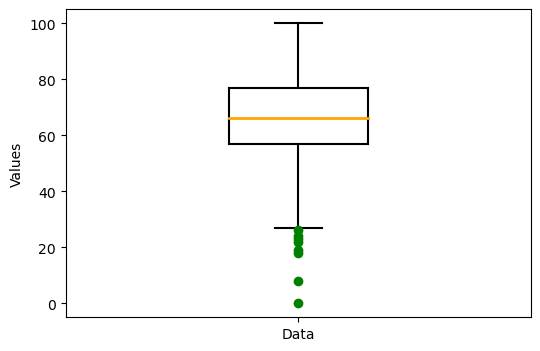

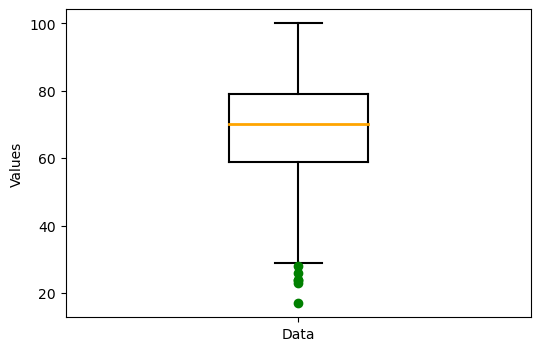

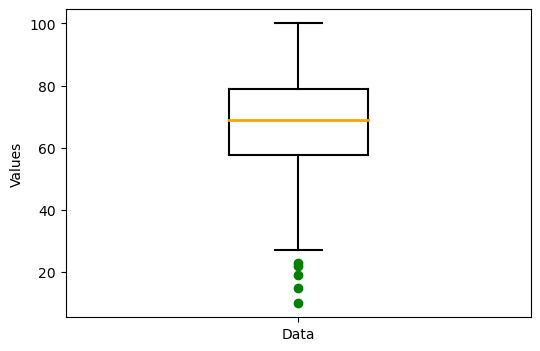

In [10]:
custom_boxplot(df['math score'])
custom_boxplot(df['reading score'])
custom_boxplot(df['writing score'])

In [11]:
outliers_dict = {}


for col in df.select_dtypes(include=['number']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers_dict[col] = df[(df[col] < lower) | (df[col] > upper)]


for col, outlier_data in outliers_dict.items():
    print(f"\n{col} Outliers:")
    print(outlier_data.shape[0])



math score Outliers:
8

reading score Outliers:
6

writing score Outliers:
5


In [12]:
def capping(data,columns):
    for col in columns:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))

In [13]:
capping(df,['math score','writing score','reading score'])

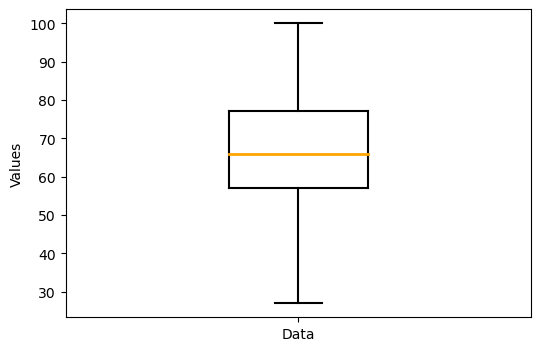

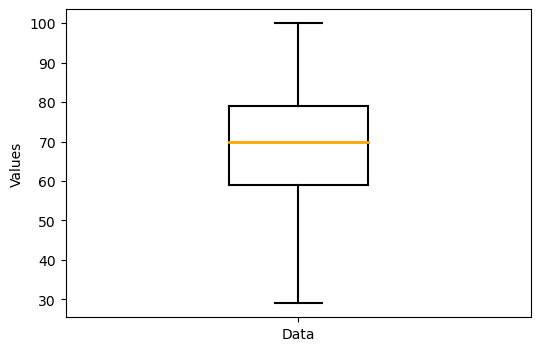

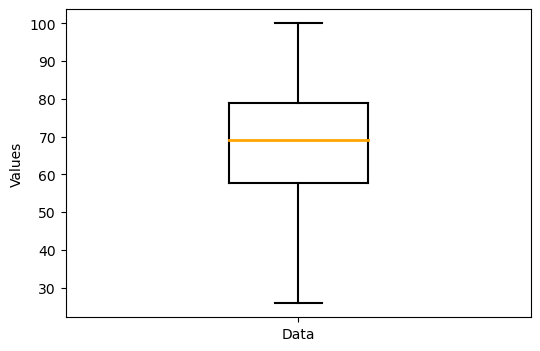

In [14]:
custom_boxplot(df['math score'])
custom_boxplot(df['reading score'])
custom_boxplot(df['writing score'])         #outliers removed

In [15]:
skewness=df[numeric_columns].skew()
skewness                  # skewness of math score is reduced    

math score      -0.148833
reading score   -0.209790
writing score   -0.223701
dtype: float64

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

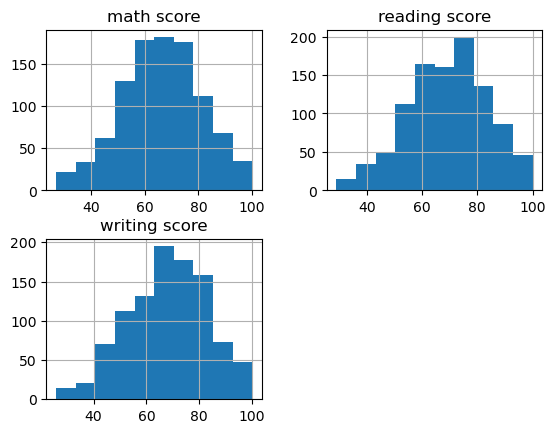

In [16]:
df.hist()

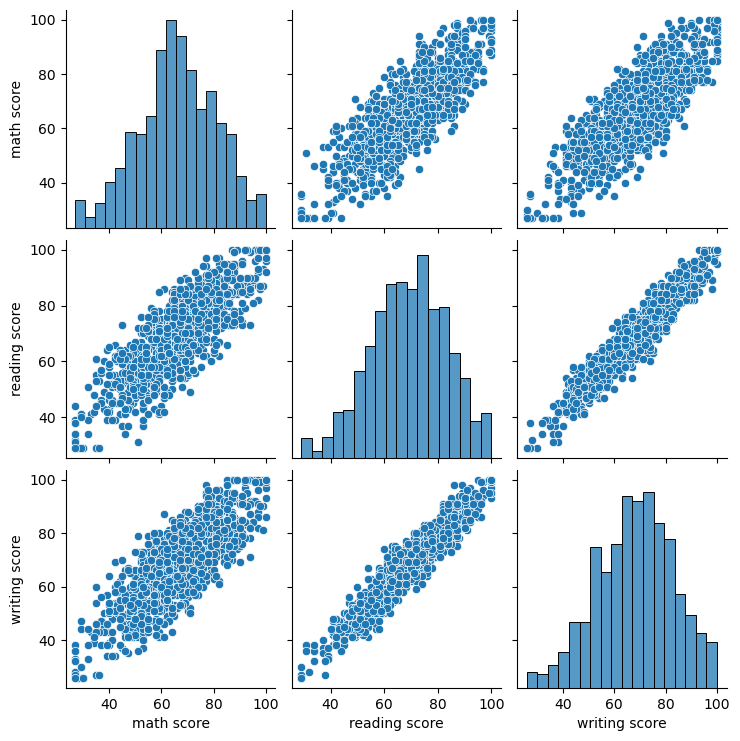

In [17]:
sns.pairplot(df)            # all linear relations 

In [18]:
df.corr(numeric_only=True)   # perason corr

,math score,reading score,writing score
math score,1.000000,0.815727,0.799954
reading score,0.815727,1.000000,0.954040
writing score,0.799954,0.954040,1.000000


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df[col] = label_encoder.fit_transform(df[col])


In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72.0,72.0,74.0
1,0,2,4,1,0,69.0,90.0,88.0
2,0,1,3,1,1,90.0,95.0,93.0
3,1,0,0,0,1,47.0,57.0,44.0
4,1,2,4,1,1,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88.0,99.0,95.0
996,1,2,2,0,1,62.0,55.0,55.0
997,0,2,2,0,0,59.0,71.0,65.0
998,0,3,4,1,0,68.0,78.0,77.0


In [21]:

sc=StandardScaler()


In [22]:

pd.DataFrame(sc.fit_transform(df),columns=df.columns)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,-0.964625,-1.015044,-0.812640,0.741881,0.746748,0.391218,0.193085,0.392118
1,-0.964625,-0.150441,0.827953,0.741881,-1.339140,0.190078,1.434787,1.321682
2,-0.964625,-1.015044,0.281088,0.741881,0.746748,1.598061,1.779704,1.653669
3,1.036672,-1.879647,-1.359505,-1.347925,0.746748,-1.284952,-0.841667,-1.599804
4,1.036672,-0.150441,0.827953,0.741881,0.746748,0.659405,0.606986,0.458515
...,...,...,...,...,...,...,...,...
995,-0.964625,1.578765,0.281088,0.741881,-1.339140,1.463967,2.055638,1.786463
996,1.036672,-0.150441,-0.265776,-1.347925,0.746748,-0.279250,-0.979634,-0.869432
997,-0.964625,-0.150441,-0.265776,-1.347925,-1.339140,-0.480390,0.124101,-0.205458
998,-0.964625,0.714162,0.827953,0.741881,-1.339140,0.123031,0.606986,0.591310


array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

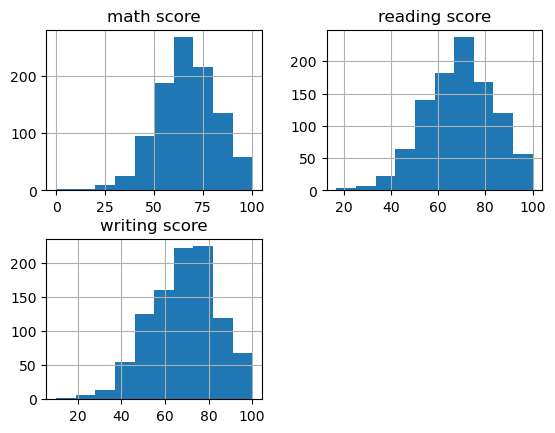

In [7]:
df.hist()          # slight left skewness observed 

<Axes: >

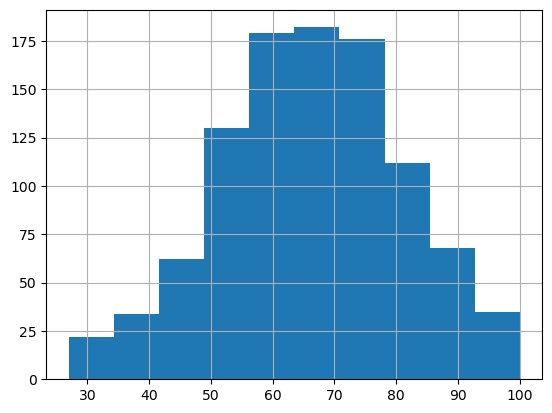

In [25]:
df['math score'].hist()